## Traffic Sign Classification with CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
import tensorflow as tf

from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation

In [12]:
# loading dataset
data = []
labels = []
classes = 43
path = '/home/eva/Schreibtisch/Bootcamp_Data_Science/12_final_project_v2/data/train'

for i in os.listdir(path):
    dir = path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (28,28), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 28, 28, 3) (39209,)


(-0.5, 45.5, 42.5, -0.5)

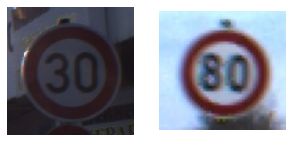

In [13]:
plt.figure(figsize=(5,5))
plt.subplot(121)

plt.imshow(Image.open('/home/eva/Schreibtisch/Bootcamp_Data_Science/12_final_project_v2/data/train/1/00001_00072_00027.png'))
plt.axis('off')

plt.subplot(122)
plt.imshow(Image.open('/home/eva/Schreibtisch/Bootcamp_Data_Science/12_final_project_v2/data/train/5/00005_00029_00022.png'))
plt.axis('off')


Text(0, 0.5, 'Number of images')

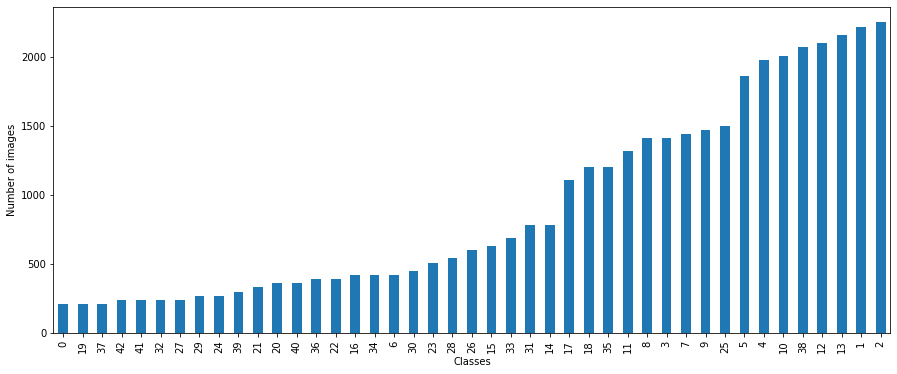

In [14]:
# number of images in each class
data_dic = {}
for folder in os.listdir(path):
    data_dic[folder] = len(os.listdir(path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.20, random_state=42)

print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

# converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)



((31367, 28, 28, 3), (31367,)) ((7842, 28, 28, 3), (7842,))


In [16]:
from tensorflow.keras import backend as K
K.clear_session()
model = Sequential([
    Conv2D(32, kernel_size = (5,5),strides = (2,2), padding = 'same', input_shape = (28,28,3)),
    MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
    Activation('relu'),
    
    Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = 'same'),
    MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
    Activation('relu'),
    
    Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = 'same'),
    MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
    Activation('relu'),
    
    Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = 'same'),
    MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
    Activation('relu'),
    
    Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = 'same'),
    MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
    Activation('relu'),
    
    Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = 'same'),
    MaxPooling2D(pool_size = (2,2), strides = (2,2), padding = 'same'),
    Activation('relu'),
    
    Flatten(),
    Dense(43),
    Activation('softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 activation (Activation)     (None, 7, 7, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 activation_1 (Activation)   (None, 2, 2, 32)          0

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,epochs=20, batch_size=32,validation_split=0.2)

Epoch 1/20
785/785 [==============================] - 3s 4ms/step - loss: 2.3365 - accuracy: 0.3350 - val_loss: 1.4421 - val_accuracy: 0.5564
Epoch 2/20
785/785 [==============================] - 3s 3ms/step - loss: 1.1760 - accuracy: 0.6276 - val_loss: 1.0491 - val_accuracy: 0.6710
Epoch 3/20
785/785 [==============================] - 3s 3ms/step - loss: 0.8887 - accuracy: 0.7205 - val_loss: 0.8204 - val_accuracy: 0.7400
Epoch 4/20
785/785 [==============================] - 3s 3ms/step - loss: 0.7434 - accuracy: 0.7647 - val_loss: 0.8530 - val_accuracy: 0.7421
Epoch 5/20
785/785 [==============================] - 3s 3ms/step - loss: 0.6310 - accuracy: 0.8027 - val_loss: 0.6298 - val_accuracy: 0.8089
Epoch 6/20
785/785 [==============================] - 3s 3ms/step - loss: 0.5743 - accuracy: 0.8192 - val_loss: 0.6266 - val_accuracy: 0.8194
Epoch 7/20
785/785 [==============================] - 3s 3ms/step - loss: 0.4923 - accuracy: 0.8464 - val_loss: 0.5381 - val_accuracy: 0.8521
Epoch 

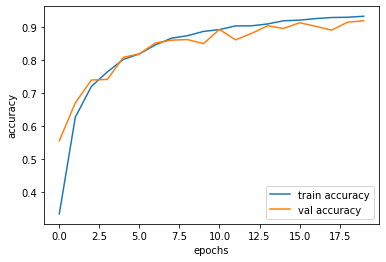

In [20]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label= 'train accuracy')
plt.plot(history.history['val_accuracy'],label= 'val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

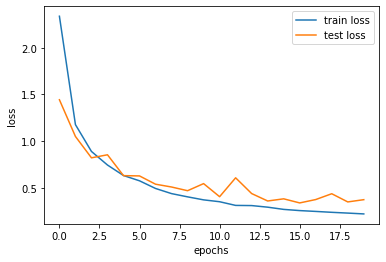

In [21]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label= 'train loss')
plt.plot(history.history['val_loss'], label= 'test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [22]:
## Test 

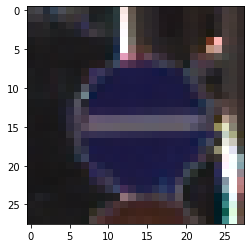

In [23]:
plt.imshow(X_test[7])

In [24]:
pred = model.predict(X_test)
pred

array([[1.15282837e-07, 2.60888715e-04, 1.07816650e-05, ...,
        1.68525633e-23, 7.69745521e-20, 3.21717346e-19],
       [8.96572885e-07, 5.21087059e-05, 4.78781828e-07, ...,
        4.04030498e-12, 7.85044862e-10, 1.49019052e-17],
       [4.10209414e-38, 1.70770621e-23, 1.98797504e-24, ...,
        9.63069902e-12, 6.22328383e-18, 7.79874541e-20],
       ...,
       [5.18992349e-10, 9.30465937e-01, 3.20787169e-02, ...,
        4.71129604e-21, 3.09534105e-25, 4.02416863e-33],
       [3.18367370e-06, 1.59780957e-05, 1.13209204e-07, ...,
        1.31031857e-24, 2.57540248e-24, 3.19878932e-31],
       [5.91387034e-05, 3.17974900e-06, 5.95373967e-06, ...,
        1.47432150e-10, 1.18506991e-08, 2.34509704e-13]], dtype=float32)

In [25]:
pred[7].argmax()

17

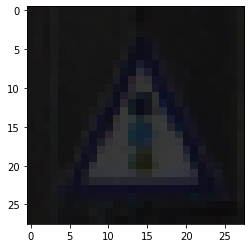

In [26]:
plt.imshow(X_test[1])

In [27]:
pred[1].argmax()

26

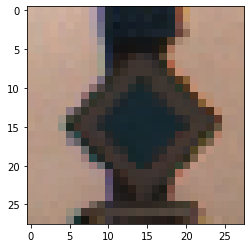

In [28]:
plt.imshow(X_test[981])

In [29]:
pred[981].argmax()

12

In [30]:
from keras.models import load_model

In [31]:
#model.save('traffic_signs.h5')

In [34]:
model = load_model('traffic_signs.h5')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 activation (Activation)     (None, 7, 7, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 activation_1 (Activation)   (None, 2, 2, 32)          0